In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

#Probelm statement:
    Given the search history of people along with the data regarding the cometitors and hotel details, we have to train a model to classify weather a person books the hotel or not.

In [0]:
!pip install pandas_profiling==2.6.0

In [0]:
import pandas as pd #for data manipulation 
import seaborn as sc #for data visualization
import matplotlib.pyplot as plt #for data Visualization
import pandas_profiling as pp #For data analysis report


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


df2 has the dataset, change the path according to one's system.

In [0]:
df2 = pd.read_csv('/content/drive/My Drive/Quisite(intern)/drive-download/Quesite Hackathon Project/train_small (1).csv')

#Understanding Data

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 37 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   search_id                       int64         
 1   timestamp                       datetime64[ns]
 2   site_id                         int64         
 3   user_country_id                 int64         
 4   listing_country_id              int64         
 5   listing_id                      int64         
 6   listing_stars                   int64         
 7   listing_review_score            float64       
 8   is_brand                        int64         
 9   location_score1                 float64       
 10  location_score2                 float64       
 11  log_historical_price            float64       
 12  listing_position                int64         
 13  price_usd                       float64       
 14  has_promotion                   int64         
 15

In [0]:
df2.shape

(2380557, 54)

In [0]:
df2.describe()# data summarization

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,2.380557e+06,1.854565e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,152107.000000,1.610221e+06,2.380557e+06,59010.000000,63662.000000,46401.000000,965758.000000,1.016116e+06,2.639700e+05,731551.000000,788086.000000,225486.000000,148194.000000,165281.000000,6.286100e+04,1.065082e+06,1.131440e+06,401164.000000,119637.000000,129892.000000,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,2.878558e+00,1.310325e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.149237e-01,1.404642e+04,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,4.982662e-01,-24.398076,1.315759e+03,2.967369e-01,0.484138,0.027740,237.746471,0.043637,3.933803e-02,2.346923e+01,0.016820,0.058079,26.303225,-0.016074,0.096393,1.545803e+02,2.273252e-02,5.156084e-02,29.110785,0.130169,0.076156,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,1.536947e+00,1.605939e-01,1.842699e+00,1.042970e+01,2.288292e+04,4.107695e-01,8.117353e+03,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,4.999971e-01,16.129689,2.029315e+03,4.568196e-01,0.642136,0.221842,1134.932987,0.447474,2.351395e-01,2.803530e+03,0.457709,0.296175,923.119202,0.576637,0.337104,5.834964e+03,5.205086e-01,2.678607e-01,1469.481661,0.561416,0.301031,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000e+00,2.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.910000e-02,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.115000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-31.267400,1.427400e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,7.000000e+00,0.000000,0.00000

In [0]:
df2.corr() # Data correlation

In [0]:
df2.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [0]:
df2['booking_value'].mean()

383.22906925950264

In [0]:
df2[df2['booking_value']>1]

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
35,28,2012-11-26 10:13:17,5,219,NaN,NaN,219,13996,4,4.0,1,2.89,0.0491,5.07,26,85.00,0,24232,3,27,1,0,1,0,NaN,116.14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,9.0,1,286.32,1
88,30,2013-02-11 01:28:38,24,216,NaN,NaN,219,125611,3,3.5,1,4.55,0.2653,5.63,13,176.98,1,20319,9,13,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,1831.30,1
95,44,2013-03-19 15:57:46,15,55,NaN,NaN,55,13205,4,4.5,0,5.14,0.1550,5.46,1,126.83,1,24752,1,1,1,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,42.0,NaN,NaN,NaN,1.0,0.0,42.0,NaN,NaN,NaN,1,126.89,1
147,66,2013-03-04 20:44:30,5,219,NaN,NaN,219,35202,3,4.5,1,2.71,NaN,4.80,12,84.00,0,5483,1,18,2,0,1,1,-25.8023,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,96.39,1
199,80,2013-01-03 10:58:19,5,219,2.5,122.34,219,107761,4,3.5,1,2.64,0.5445,4.99,4,127.00,0,7274,2,24,1,0,1,0,NaN,386.87,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,1,324.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380333,665527,2013-03-24 19:38:17,5,219,NaN,NaN,219,119322,4,4.0,1,4.63,0.1855,5.58,16,186.00,0,15208,5,124,2,1,1,0,NaN,4967.39,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1059.78,1
2380377,665533,2013-03-24 21:28:42,5,219,NaN,NaN,219,85599,3,0.0,1,2.77,0.0688,5.40,2,543.00,0,5206,3,236,1,0,1,1,NaN,1771.30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1870.62,1
2380389,665535,2013-03-21 19:34:47,5,219,NaN,NaN,219,55964,3,4.0,1,1.39,0.4329,4.40,2,97.00,0,18019,3,176,2,0,1,1,NaN,273.86,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,323.20,1
2380409,665539,2012-11-24 16:45:09,5,219,NaN,NaN,219,66515,3,4.0,1,1.95,0.0379,4.83,25,75.00,0,9421,1,1,2,0,1,0,NaN,254.25,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,84.57,1


In [0]:
df2[df2['booked']==1]

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
35,28,2012-11-26 10:13:17,5,219,NaN,NaN,219,13996,4,4.0,1,2.89,0.0491,5.07,26,85.00,0,24232,3,27,1,0,1,0,NaN,116.14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,9.0,1,286.32,1
88,30,2013-02-11 01:28:38,24,216,NaN,NaN,219,125611,3,3.5,1,4.55,0.2653,5.63,13,176.98,1,20319,9,13,2,0,1,0,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,1831.30,1
95,44,2013-03-19 15:57:46,15,55,NaN,NaN,55,13205,4,4.5,0,5.14,0.1550,5.46,1,126.83,1,24752,1,1,1,0,1,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,42.0,NaN,NaN,NaN,1.0,0.0,42.0,NaN,NaN,NaN,1,126.89,1
147,66,2013-03-04 20:44:30,5,219,NaN,NaN,219,35202,3,4.5,1,2.71,NaN,4.80,12,84.00,0,5483,1,18,2,0,1,1,-25.8023,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,96.39,1
199,80,2013-01-03 10:58:19,5,219,2.5,122.34,219,107761,4,3.5,1,2.64,0.5445,4.99,4,127.00,0,7274,2,24,1,0,1,0,NaN,386.87,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,1,324.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380333,665527,2013-03-24 19:38:17,5,219,NaN,NaN,219,119322,4,4.0,1,4.63,0.1855,5.58,16,186.00,0,15208,5,124,2,1,1,0,NaN,4967.39,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1059.78,1
2380377,665533,2013-03-24 21:28:42,5,219,NaN,NaN,219,85599,3,0.0,1,2.77,0.0688,5.40,2,543.00,0,5206,3,236,1,0,1,1,NaN,1771.30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1870.62,1
2380389,665535,2013-03-21 19:34:47,5,219,NaN,NaN,219,55964,3,4.0,1,1.39,0.4329,4.40,2,97.00,0,18019,3,176,2,0,1,1,NaN,273.86,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,323.20,1
2380409,665539,2012-11-24 16:45:09,5,219,NaN,NaN,219,66515,3,4.0,1,1.95,0.0379,4.83,25,75.00,0,9421,1,1,2,0,1,0,NaN,254.25,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,84.57,1


In [0]:
df2['clicked'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
2380552    False
2380553    False
2380554    False
2380555    False
2380556    False
Name: clicked, Length: 2380557, dtype: bool

In [0]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [0]:
df2['timestamp']

0         2012-12-31 08:59:22
1         2012-12-31 08:59:22
2         2012-12-31 08:59:22
3         2012-12-31 08:59:22
4         2012-12-31 08:59:22
                  ...        
2380552   2013-03-30 16:39:40
2380553   2013-03-30 16:39:40
2380554   2013-03-30 16:39:40
2380555   2013-03-30 16:39:40
2380556   2013-03-30 16:39:40
Name: timestamp, Length: 2380557, dtype: datetime64[ns]

In [0]:
df2.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [0]:
df2.isna().sum().sum()

57508279

#Click-Through rate

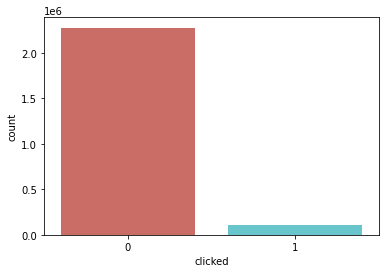

In [0]:
sc.countplot(x='clicked',data=df2, palette='hls')
plt.show()

In [0]:
df2['clicked'].value_counts()/len(df2)

0    0.955433
1    0.044567
Name: clicked, dtype: float64

The approximate click through rate is 4% and not clicking is 95%.

#Handling missing values

###Missing values in booking_value column are imputed with zero
- because for every booking_value > 1, the value of booked is 1.

In [0]:
df2['booking_value'].fillna(0,inplace=True) #null values in 'booking_value' are imputed with zero

In [0]:
df2['booking_value']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2380552    0.0
2380553    0.0
2380554    0.0
2380555    0.0
2380556    0.0
Name: booking_value, Length: 2380557, dtype: float64

In [0]:
#df2


In [0]:
#df2.corr()

In [0]:
df2['listing_review_score']

0          4.0
1          4.0
2          4.5
3          4.0
4          4.5
          ... 
2380552    4.5
2380553    4.5
2380554    4.5
2380555    4.0
2380556    4.0
Name: listing_review_score, Length: 2380557, dtype: float64

In [0]:
min(df2['listing_review_score'])

0.0

In [0]:
df2['listing_review_score'].mode(
)

0    4.0
dtype: float64

In [0]:
df2[['listing_stars','listing_review_score']]

,listing_stars,listing_review_score
0,4,4.0
1,4,4.0
2,5,4.5
3,3,4.0
4,5,4.5
...,...,...
2380552,4,4.5
2380553,4,4.5
2380554,5,4.5
2380555,3,4.0


In [0]:
df2['listing_stars'].isnull().sum()

0

In [0]:
na=df2['listing_review_score'].isnull()

In [0]:
df2['listing_review_score'][na]

3303      NaN
5205      NaN
5555      NaN
6914      NaN
7569      NaN
           ..
2374632   NaN
2374645   NaN
2377000   NaN
2378471   NaN
2378956   NaN
Name: listing_review_score, Length: 3486, dtype: float64

In [0]:
df2['listing_stars'][na]

3303       3
5205       3
5555       3
6914       4
7569       3
          ..
2374632    3
2374645    4
2377000    0
2378471    3
2378956    3
Name: listing_stars, Length: 3486, dtype: int64

###Missing values in 'listing_review_score' are imputed
-  with corresponding values in 'listing_starts' as the values in those two columns are very similar to each other.

In [0]:
df2['listing_review_score'][na] = (df2['listing_stars'][na])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df2['listing_review_score'][3303]

3.0

In [0]:
df2.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                    0
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

###Droping columns with high no. of null values.

In [0]:
df2 = df2.drop(['competitor1_rate', 'competitor1_has_availability',
       'competitor1_price_percent_diff',
       'competitor2_price_percent_diff',
       'competitor3_price_percent_diff', 'competitor4_rate',
       'competitor4_has_availability', 'competitor4_price_percent_diff',
       'competitor6_rate',
       'competitor6_has_availability', 'competitor6_price_percent_diff',
       'competitor7_rate', 'competitor7_has_availability',
       'competitor7_price_percent_diff','competitor8_price_percent_diff'], axis=1)

In [0]:
df2 = df2.drop('log_click_proportion', axis=1)

In [0]:
df2 = df2.drop(['user_hist_stars','user_hist_paid'], axis=1)

In [0]:
df2['location_score1'].max()

6.98

In [0]:
df2['location_score2'].fillna(df2['location_score2'].mean(), inplace=True)

In [0]:
df2['location_score2'].isnull().sum()

0

In [0]:
df2[df2['booked']==0].count()

search_id                         2314169
timestamp                         2314169
site_id                           2314169
user_country_id                   2314169
listing_country_id                2314169
listing_id                        2314169
listing_stars                     2314169
listing_review_score              2314169
is_brand                          2314169
location_score1                   2314169
location_score2                   2314169
log_historical_price              2314169
listing_position                  2314169
price_usd                         2314169
has_promotion                     2314169
destination_id                    2314169
length_of_stay                    2314169
booking_window                    2314169
num_adults                        2314169
num_kids                          2314169
num_rooms                         2314169
stay_on_saturday                  2314169
distance_to_dest                  1565304
random_sort                       

In [0]:
mean = df2['distance_to_dest'].mean()

In [0]:
df2['distance_to_dest'].fillna(mean, inplace=True)

In [0]:
df2.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                    0
is_brand                                0
location_score1                         0
location_score2                         0
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                        0
distance_to_dest                        0
random_sort                       

In [0]:
li = ['competitor2_rate', 'competitor2_has_availability',
       'competitor3_rate', 'competitor3_has_availability', 'competitor5_rate',
       'competitor5_has_availability',
      'competitor8_rate', 'competitor8_has_availability']

In [0]:
li[1]

'competitor2_has_availability'

In [0]:
mode=df2['competitor2_rate'].mode()
#list(mode)
mode[0]

0.0

In [0]:
for i in li:
  print(df2[i])
  df2[i].fillna(df2[i].mode()[0], inplace=True) 

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
2380552    NaN
2380553    0.0
2380554    0.0
2380555    0.0
2380556    0.0
Name: competitor2_rate, Length: 2380557, dtype: float64
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
2380552    NaN
2380553    0.0
2380554    0.0
2380555    0.0
2380556    0.0
Name: competitor2_has_availability, Length: 2380557, dtype: float64
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
2380552    NaN
2380553    0.0
2380554    0.0
2380555    0.0
2380556    0.0
Name: competitor3_rate, Length: 2380557, dtype: float64
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
2380552    NaN
2380553    0.0
2380554    0.0
2380555    0.0
2380556    0.0
Name: competitor3_has_availability, Length: 2380557, dtype: float64
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
23

In [0]:
df2.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                    0
is_brand                                0
location_score1                         0
location_score2                         0
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                        0
distance_to_dest                        0
random_sort                       

In [0]:
df2['competitor5_price_percent_diff'].fillna(df2['competitor5_price_percent_diff'].mean(), inplace = True)

In [0]:
df2.isnull().sum()

search_id                         0
timestamp                         0
site_id                           0
user_country_id                   0
listing_country_id                0
listing_id                        0
listing_stars                     0
listing_review_score              0
is_brand                          0
location_score1                   0
location_score2                   0
log_historical_price              0
listing_position                  0
price_usd                         0
has_promotion                     0
destination_id                    0
length_of_stay                    0
booking_window                    0
num_adults                        0
num_kids                          0
num_rooms                         0
stay_on_saturday                  0
distance_to_dest                  0
random_sort                       0
competitor2_rate                  0
competitor2_has_availability      0
competitor3_rate                  0
competitor3_has_availability

#Oulier Handling
- Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
- In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

- It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

- IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

In [0]:
"""Q1 = df2['log_historical_price'].quantile(0.25)
Q3 = df2['log_historical_price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5*IQR
low = Q1 - 1.5*IQR
print(low,up)
df2.drop((df2[(df2['log_historical_price']<low) | (df2['log_historical_price']>up)].index))"""

"Q1 = df2['log_historical_price'].quantile(0.25)\nQ3 = df2['log_historical_price'].quantile(0.75)\nIQR = Q3 - Q1\nprint(IQR)\nup = Q3 + 1.5*IQR\nlow = Q1 - 1.5*IQR\nprint(low,up)\ndf2.drop((df2[(df2['log_historical_price']<low) | (df2['log_historical_price']>up)].index))"

In [0]:
#df3['listing_stars'].quantile(0.25)

In [0]:
li2 = ['timestamp',
 'listing_stars',
 'listing_review_score',
 'is_brand',
 'location_score1',
 'location_score2',
 'log_historical_price',
 'listing_position',
 'price_usd',
 'length_of_stay',
 'booking_window',
 'stay_on_saturday',
 'distance_to_dest',
 'random_sort']

In [0]:
li2.pop(0)

'timestamp'

In [0]:
df3 = df2.copy()

In [0]:

#df7 = df7.loc[:, df7.columns != ['search_id', 'site_id', 'user_country_id', 'listing_country_id', 'listing_id', 'destination_id']]
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
print(IQR>0)
print(IQR)

search_id                          True
site_id                            True
user_country_id                    True
listing_country_id                 True
listing_id                         True
listing_stars                      True
listing_review_score               True
is_brand                           True
location_score1                    True
location_score2                    True
log_historical_price               True
listing_position                   True
price_usd                          True
has_promotion                     False
destination_id                     True
length_of_stay                     True
booking_window                     True
num_adults                        False
num_kids                          False
num_rooms                         False
stay_on_saturday                   True
distance_to_dest                   True
random_sort                        True
competitor2_rate                  False
competitor2_has_availability      False


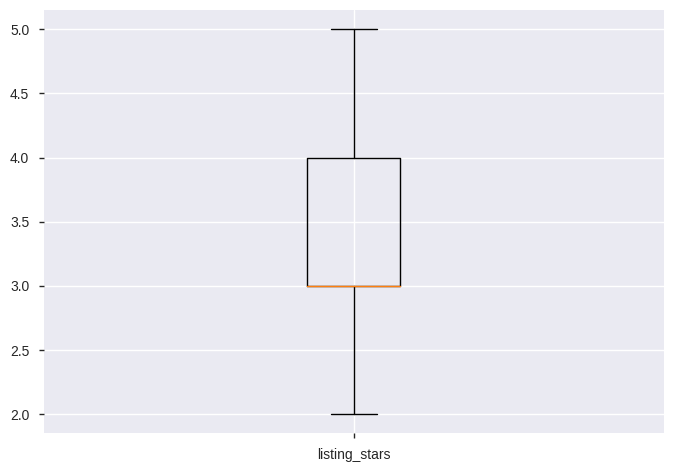

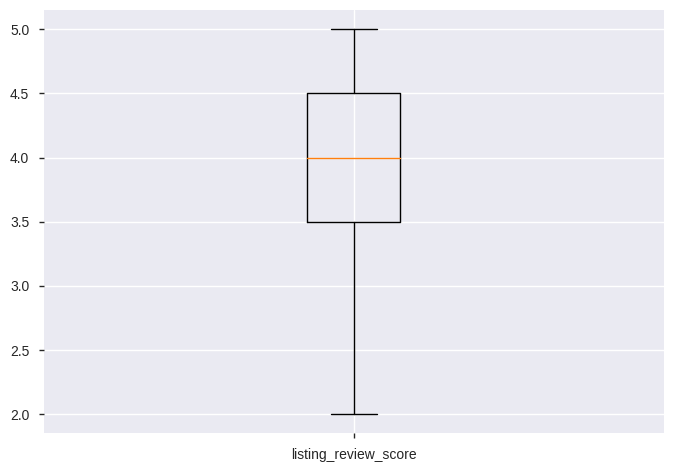

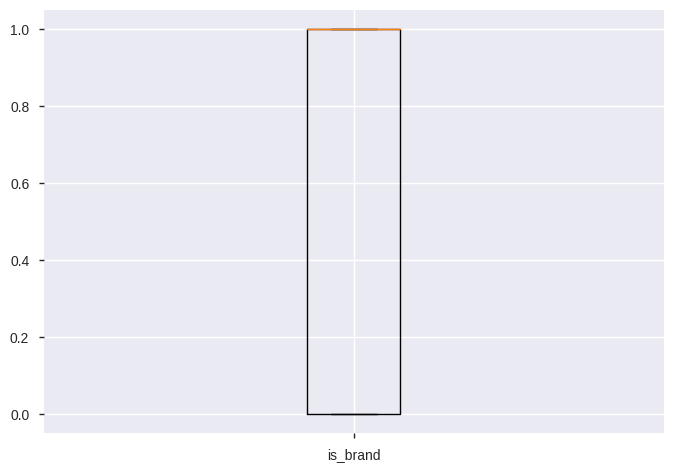

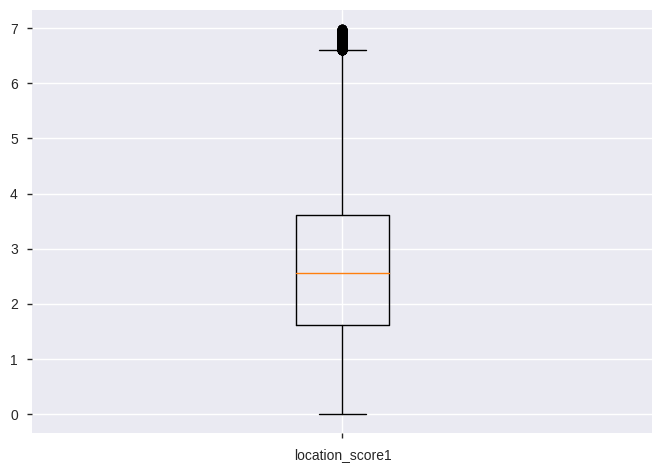

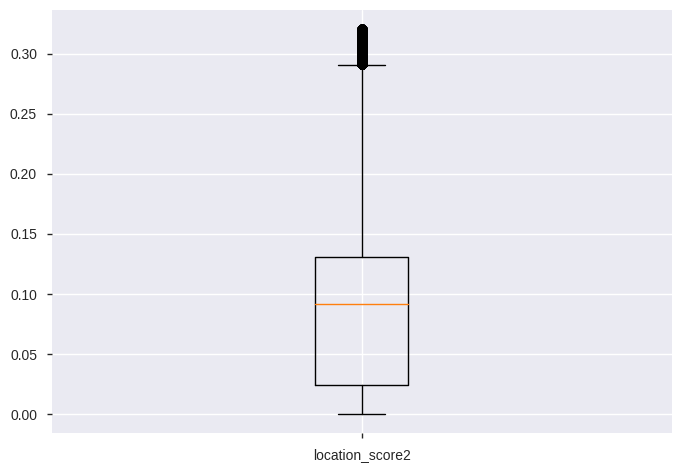

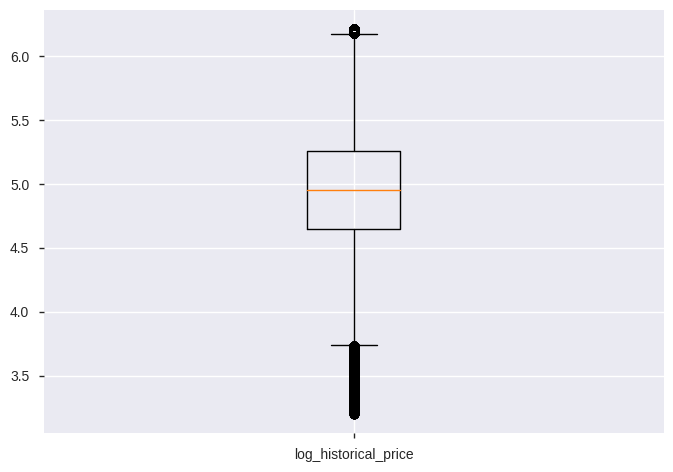

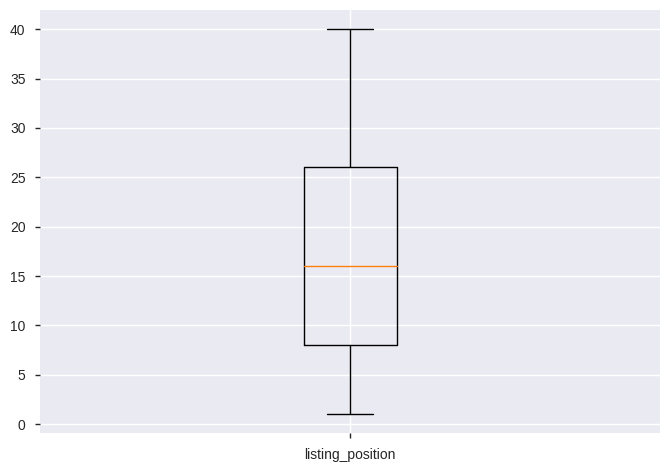

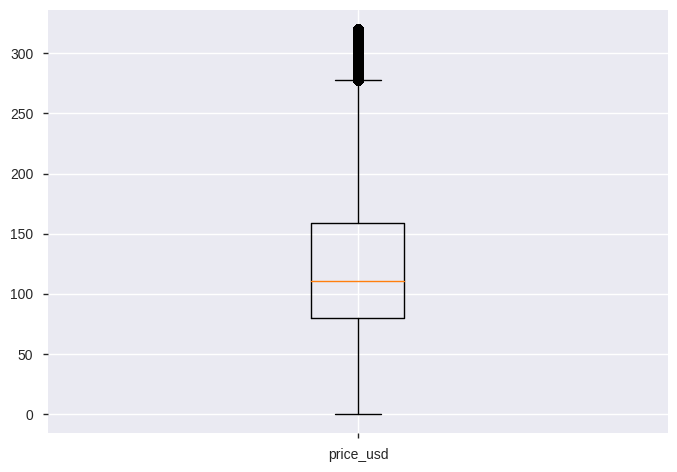

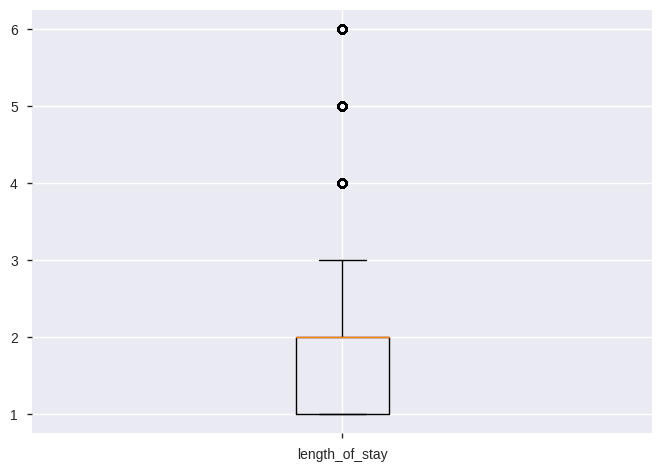

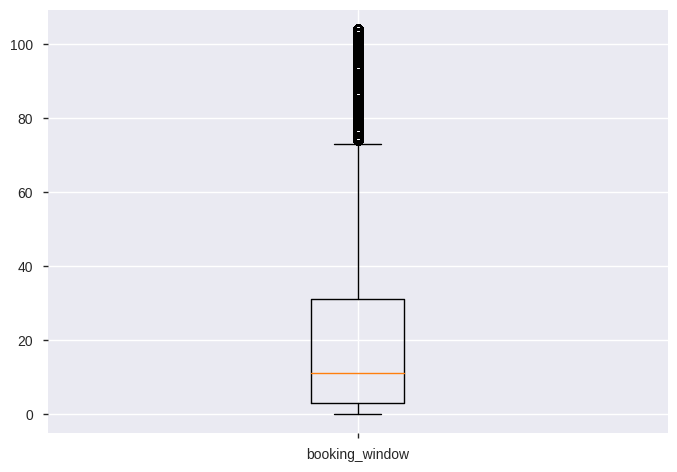

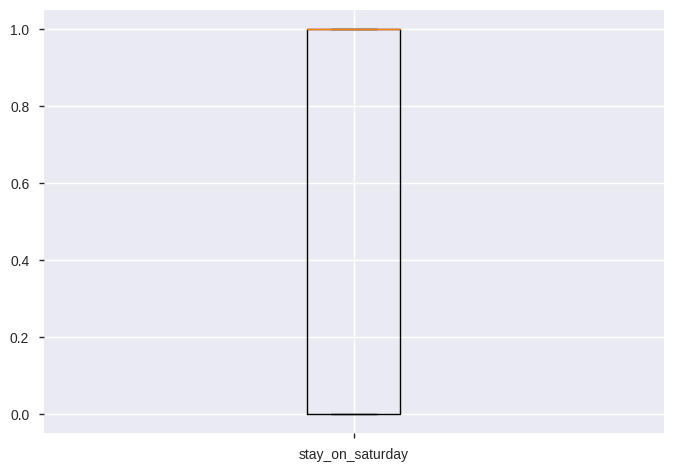

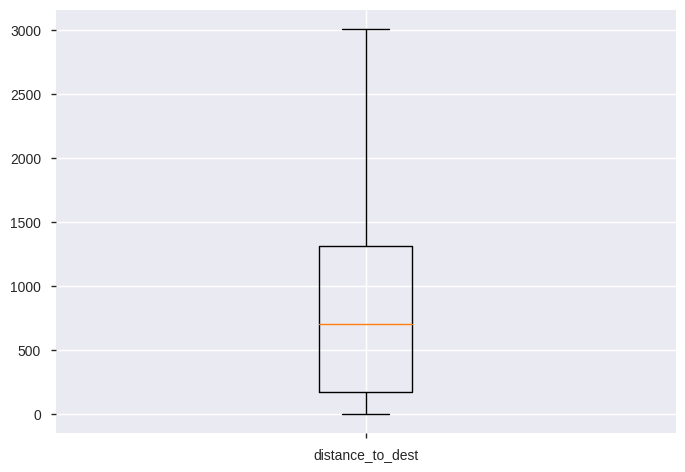

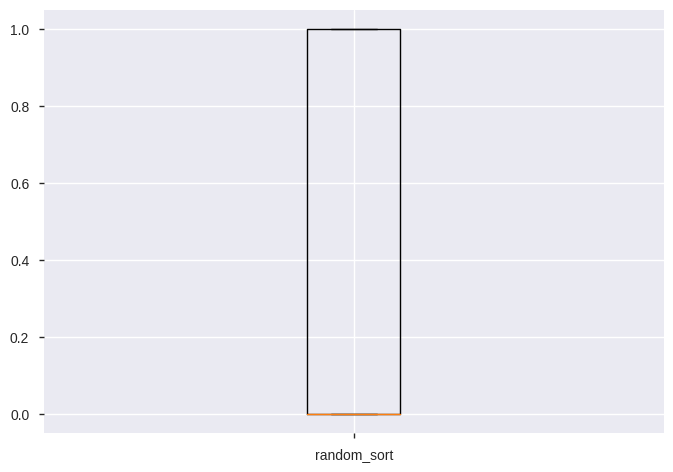

In [0]:
for i in li2:
    plt.figure()
    (plt.boxplot(df3[i],labels=[i]))
    plt.show()

In [0]:
for i in li2:
  Q1 = df3[i].quantile(0.25)
  Q3 = df3[i].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - (1.5*IQR)
  upper = Q3 + (1.5*IQR)
  print('_____________'+i+'_____________')
  df3 = df3.drop((df3[(df3[i]<lower) | (df3[i]>upper)].index))
  print(df3)
  #print(df3)



_____________listing_stars_____________
         search_id            timestamp  ...  booking_value  booked
0                4  2012-12-31 08:59:22  ...            0.0       0
1                4  2012-12-31 08:59:22  ...            0.0       0
2                4  2012-12-31 08:59:22  ...            0.0       0
3                4  2012-12-31 08:59:22  ...            0.0       0
4                4  2012-12-31 08:59:22  ...            0.0       0
...            ...                  ...  ...            ...     ...
2380552     665573  2013-03-30 16:39:40  ...            0.0       0
2380553     665573  2013-03-30 16:39:40  ...            0.0       0
2380554     665573  2013-03-30 16:39:40  ...            0.0       0
2380555     665573  2013-03-30 16:39:40  ...            0.0       0
2380556     665573  2013-03-30 16:39:40  ...            0.0       0

[2290480 rows x 36 columns]
_____________listing_review_score_____________
         search_id            timestamp  ...  booking_value  booked


In [0]:
df2.index

RangeIndex(start=0, stop=2380557, step=1)

In [0]:
df3.shape

(1292461, 36)

In [0]:
#df3.to_csv('/content/drive/My Drive/Quisite(intern)/drive-download/Quesite Hackathon Project/clean_data.csv', index=False)

In [0]:
df2.isnull().sum()

search_id                         0
timestamp                         0
site_id                           0
user_country_id                   0
listing_country_id                0
listing_id                        0
listing_stars                     0
listing_review_score              0
is_brand                          0
location_score1                   0
location_score2                   0
log_historical_price              0
listing_position                  0
price_usd                         0
has_promotion                     0
destination_id                    0
length_of_stay                    0
booking_window                    0
num_adults                        0
num_kids                          0
num_rooms                         0
stay_on_saturday                  0
distance_to_dest                  0
random_sort                       0
competitor2_rate                  0
competitor2_has_availability      0
competitor3_rate                  0
competitor3_has_availability

In [0]:
df3.isnull().sum()

search_id                         0
timestamp                         0
site_id                           0
user_country_id                   0
listing_country_id                0
listing_id                        0
listing_stars                     0
listing_review_score              0
is_brand                          0
location_score1                   0
location_score2                   0
log_historical_price              0
listing_position                  0
price_usd                         0
has_promotion                     0
destination_id                    0
length_of_stay                    0
booking_window                    0
num_adults                        0
num_kids                          0
num_rooms                         0
stay_on_saturday                  0
distance_to_dest                  0
random_sort                       0
competitor2_rate                  0
competitor2_has_availability      0
competitor3_rate                  0
competitor3_has_availability

In [0]:
clean_data = df3

In [0]:
#df4 = df3.groupby('search_id', ).mean()
#del(d4,df4)

In [0]:
#df4#df4 = df3[1:500]

In [0]:
#df4.ix[:,df4.columns]

In [0]:
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(df4))
#print(z)

In [0]:
clean_data.corr()

,search_id,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,competitor2_rate,competitor2_has_availability,competitor3_rate,competitor3_has_availability,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor8_rate,competitor8_has_availability,clicked,booking_value,booked
search_id,1.000000,0.001373,-0.001173,-0.005820,-0.000316,0.003719,0.001824,-0.001942,0.003074,-0.000324,0.004895,0.002026,0.005027,-0.000064,-0.004632,0.001115,0.007894,0.006324,-0.002965,-0.000341,-0.002529,0.001248,0.002459,0.001471,0.001035,0.000088,0.001330,0.001349,0.004472,-0.000524,0.000655,0.000505,-0.000492,-0.000247,-0.000472
site_id,0.001373,1.000000,-0.399354,-0.415305,0.001851,0.251862,0.005406,-0.226480,0.200258,0.014568,0.101485,-0.041858,0.068077,0.093488,0.027773,0.079755,0.117703,-0.035971,-0.056874,0.025801,-0.062183,0.237645,-0.000519,0.032345,-0.008684,0.021618,0.010449,-0.013103,-0.000629,-0.004131,0.041042,-0.011871,0.012557,0.013929,0.004904
user_country_id,-0.001173,-0.399354,1.000000,0.612223,0.000807,-0.195347,-0.018147,0.206328,-0.159049,0.000489,-0.100696,0.026975,-0.064150,-0.046166,-0.013341,-0.067524,-0.073835,0.016972,0.023801,-0.030625,0.051702,-0.227290,-0.014918,-0.008815,0.016327,-0.008985,0.020794,0.015830,0.004456,0.008104,-0.039604,0.015094,-0.009304,-0.012421,-0.003562
listing_country_id,-0.005820,-0.415305,0.612223,1.000000,0.000223,-0.251144,-0.021285,0.290957,-0.195136,-0.010645,-0.125648,0.038346,-0.069565,-0.057278,-0.009134,-0.058131,-0.065796,0.034714,0.053499,-0.021956,0.047939,-0.225016,-0.010586,-0.016652,0.018658,-0.014410,0.028442,0.018960,0.004089,0.007583,-0.050710,0.016148,-0.010882,-0.013269,-0.004515
listing_id,-0.000316,0.001851,0.000807,0.000223,1.000000,0.007861,0.007854,-0.000147,-0.003421,0.007227,-0.004032,-0.002432,-0.003275,0.004065,-0.006658,0.003295,0.000224,0.001289,-0.000063,0.000943,0.000157,0.001671,0.001464,0.001251,0.002163,0.001080,-0.000354,0.000512,0.001281,-0.003156,0.004098,0.004520,0.000976,0.000084,0.000569
listing_stars,0.003719,0.251862,-0.195347,-0.251144,0.007861,1.000000,0.458778,-0.082657,0.302138,0.082916,0.675836,-0.105014,0.545146,0.157273,-0.012956,0.088974,0.071451,-0.019308,-0.040423,0.019395,-0.027538,0.163585,-0.029782,0.039046,0.010822,0.025596,0.005068,0.017800,0.011544,0.005296,0.078858,-0.000848,0.038017,0.053824,0.029349
listing_review_score,0.001824,0.005406,-0.018147,-0.021285,0.007854,0.458778,1.000000,0.100280,0.078543,0.022395,0.461497,-0.055942,0.391651,-0.000434,-0.003683,0.010917,0.027266,-0.006144,-0.000829,0.001954,0.006358,0.018399,-0.033358,0.005355,0.007628,0.000539,-0.006433,0.027771,-0.000437,0.013420,0.061140,0.001402,0.018218,0.030018,0.018727
is_brand,-0.001942,-0.226480,0.206328,0.290957,-0.000147,-0.082657,0.100280,1.000000,-0.206164,-0.032967,-0.064981,0.044768,-0.029101,-0.165964,-0.020854,-0.096784,-0.073760,0.006679,0.035600,0.014132,0.055345,-0.134673,-0.015250,-0.057309,-0.021434,-0.036839,-0.013760,0.037200,-0.005992,0.006184,-0.031518,-0.026238,-0.006212,-0.004867,0.001406
location_score1,0.003074,0.200258,-0.159049,-0.195136,-0.003421,0.302138,0.078543,-0.206164,1.000000,0.310487,0.370926,0.003849,0.267840,0.186668,-0.034635,0.127019,0.096922,0.011112,-0.017354,0.019465,-0.037385,0.124618,-0.025348,0.023559,0.009919,0.016786,0.001932,-0.007778,0.029420,-0.016002,0.020645,-0.003663,0.010163,0.027921,0.005048
location_score2,-0.000324,0.014568,0.000489,-0.010645,0.007227,0.082916,0.022395,-0.032967,0.310487,1.000000,0.091825,-0.137303,0.066851,0.038728,-0.015576,-0.007841,0.004350,-0.000192,-0.052033,-0.021538,-0.004684,-0.012914,-0.026374,0.002648,-0.001240,-0.003203,-0.015288,0.000472,0.009986,0.002203,0.007382,-0.000388,0.052328,0.034906,0.0

In [0]:
pd.to_datetime(clean_data['timestamp'])

0         2012-12-31 08:59:22
1         2012-12-31 08:59:22
11        2012-12-31 08:59:22
12        2012-12-31 08:59:22
19        2012-12-31 08:59:22
                  ...        
2380550   2013-03-30 16:39:40
2380551   2013-03-30 16:39:40
2380552   2013-03-30 16:39:40
2380555   2013-03-30 16:39:40
2380556   2013-03-30 16:39:40
Name: timestamp, Length: 1292461, dtype: datetime64[ns]

In [0]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292461 entries, 0 to 2380556
Data columns (total 36 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   search_id                       1292461 non-null  int64  
 1   timestamp                       1292461 non-null  object 
 2   site_id                         1292461 non-null  int64  
 3   user_country_id                 1292461 non-null  int64  
 4   listing_country_id              1292461 non-null  int64  
 5   listing_id                      1292461 non-null  int64  
 6   listing_stars                   1292461 non-null  int64  
 7   listing_review_score            1292461 non-null  float64
 8   is_brand                        1292461 non-null  int64  
 9   location_score1                 1292461 non-null  float64
 10  location_score2                 1292461 non-null  float64
 11  log_historical_price            1292461 non-null  float64
 12  

In [0]:
#profile_report = pp.ProfileReport(clean_data)

In [0]:
#profile_report

In [0]:
#profile_report.to_file(output_file='/content/drive/My Drive/Quisite(intern)/drive-download/Quesite Hackathon Project/profile_report.html')

In [0]:
plt.hist(clean_data['booked'])
plt.show()

In [0]:
import numpy as np


In [0]:
np.log(clean_data['booked'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         -inf
1         -inf
11        -inf
12        -inf
19        -inf
          ... 
2380550   -inf
2380551   -inf
2380552   -inf
2380555   -inf
2380556   -inf
Name: booked, Length: 1292461, dtype: float64

#SMOTE for imbalances 'booked' feature(class label)
- A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

In [0]:
#sc.scatterplot()

In [0]:
#!sudo pip install imbalanced-learn

In [0]:
# check version number
import imblearn
print(imblearn.__version__)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
print(sum(clean_data['booked']==1))
print(sum(clean_data['booked']==0))

36557
1255904


In [0]:
pd.value_counts(clean_data['booked']).plot.bar()
plt.title('Search_history')
plt.xlabel('Booked')
plt.ylabel('Frequency')
clean_data['booked'].value_counts()

0    1255904
1      36557
Name: booked, dtype: int64

In [0]:
clean_data.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'distance_to_dest', 'random_sort',
       'competitor2_rate', 'competitor2_has_availability', 'competitor3_rate',
       'competitor3_has_availability', 'competitor5_rate',
       'competitor5_has_availability', 'competitor5_price_percent_diff',
       'competitor8_rate', 'competitor8_has_availability', 'clicked',
       'booking_value', 'booked'],
      dtype='object')

In [0]:
X = (clean_data.drop(['booked','timestamp'], axis=1))
Y = clean_data['booked']

In [0]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1033968, 34)
Number transactions y_train dataset:  (1033968,)
Number transactions X_test dataset:  (258493, 34)
Number transactions y_test dataset:  (258493,)


In [0]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 29081
Before OverSampling, counts of label '0': 1004887 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (2009774, 34)
After OverSampling, the shape of train_y: (2009774,) 

After OverSampling, counts of label '1': 1004887
After OverSampling, counts of label '0': 1004887


In [0]:
#Counter(y_train_res)

In [0]:
from collections import  Counter
from numpy import where
counter = Counter(y_train)

In [0]:
plt.hist(y_train)

(array([1004887.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1004887.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import time

In [0]:
model_rf1 = RandomForestClassifier(random_state=0)


#Hyperparameters Optimization

Utilizing the GridSearchCV functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data. Setting the n_jobs to 3 tells the grid search to run three jobs in parallel, reducing the time the function will take to compute the best parameters. I included the timer to see how long different jobs took; that led me to ultimately decide to use three parallel jobs.

This will help set the parameters we will use to tune one final parameter: the number of trees in our forest.


In [0]:
"""np.random.seed(42)
start = time.time()
print('Start time is {0: .2f}'.format(start))
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf1, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))"""

"np.random.seed(42)\nstart = time.time()\nprint('Start time is {0: .2f}'.format(start))\nparam_dist = {'max_depth': [2, 3, 4],\n              'bootstrap': [True, False],\n              'max_features': ['auto', 'sqrt', 'log2', None],\n              'criterion': ['gini', 'entropy']}\n\ncv_rf = GridSearchCV(model_rf1, cv = 10,\n                     param_grid=param_dist, \n                     n_jobs = 3)\n\ncv_rf.fit(X_train, y_train)\nprint('Best Parameters using grid search: \n', \n      cv_rf.best_params_)\nend = time.time()\nprint('Time taken in grid search: {0: .2f}'.format(end - start))"

In [0]:
# Set best parameters given by grid search 
model_rf1.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#Out of Bag Error Rate

Another useful feature of random forest is the concept of an out-of-bag (OOB) error rate. Because only two-thirds of the data are used to train each tree when building the forest, one-third of unseen data can be used in a way that is advantageous to our accuracy metrics without being as computationally expensive as something like cross validation, for instance.

As outlined below, when calculating OOB, two parameters have to be changed. Also, by utilizing a for-loop across a multitude of forest sizes, we can calculate the OOB error rate and use it to asses how many trees are appropriate for our model!

In [0]:
X_train.shape

(2009774, 34)

In [0]:
"""model_rf1.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 200

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf1.set_params(n_estimators=i)
    model_rf1.fit(X_train, y_train)

    oob_error = 1 - model_rf1.oob_score_
    error_rate[i] = oob_error"""

'model_rf1.set_params(warm_start=True, \n                  oob_score=True)\n\nmin_estimators = 15\nmax_estimators = 200\n\nerror_rate = {}\n\nfor i in range(min_estimators, max_estimators + 1):\n    model_rf1.set_params(n_estimators=i)\n    model_rf1.fit(X_train, y_train)\n\n    oob_error = 1 - model_rf1.oob_score_\n    error_rate[i] = oob_error'

In [0]:
#error_rate

In [0]:
model_rf1.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
model_rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#Variable Importance

Once we have trained the model, we can assess variable importance. One downside to using ensemble methods with decision trees is that you lose the interpretability a single tree gives. A single tree can outline for us important node splits, as well as variables that were important at each split.

Fortunately, ensemble methods that rely on CART models use a metric to evaluate the homogeneity of splits. Thus, when creating ensembles, these metrics can be utilized to give insight into the important variables used in the training of the model. Two such metrics are gini impurity and entropy. Many people favor gini impurity because it has a lower computational cost than entropy, which requires calculating the logarithmic function. For more information, I recommend reading this article.

The two metrics vary and from reading documentation online, many people favor gini impurity due to the computational cost of entropy since it requires calculating the logarithmic function. For more discussion I recommend reading this article.

Here we define each metric:

Gini Impurity=1−∑ipi

and

Entropy=∑i−pi∗log2pi

where pi is defined as the proportion of subsamples that belong to a certain target class.

Since we are utilizing the gini impurity, the impurity measure reaches 0 when all target class labels are the same.

Let's access the feature importance of the model and use a helper function to output the importance of our variables in descending order.

In [0]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [0]:
var_imp_rf = variable_importance(model_rf1)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [0]:
names_index = list(clean_data.columns)
names_index.pop()

'booked'

In [0]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [0]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'clicked' has a Mean Decrease in Impurity of 0.35285
2. The feature 'competitor8_has_availability' has a Mean Decrease in Impurity of 0.31080
3. The feature 'log_historical_price' has a Mean Decrease in Impurity of 0.07614
4. The feature 'distance_to_dest' has a Mean Decrease in Impurity of 0.06475
5. The feature 'price_usd' has a Mean Decrease in Impurity of 0.04195
6. The feature 'listing_id' has a Mean Decrease in Impurity of 0.03973
7. The feature 'listing_review_score' has a Mean Decrease in Impurity of 0.02085
8. The feature 'num_rooms' has a Mean Decrease in Impurity of 0.01602
9. The feature 'timestamp' has a Mean Decrease in Impurity of 0.01592
10. The feature 'booking_window' has a Mean Decrease in Impurity of 0.01022
11. The feature 'site_id' has a Mean Decrease in Impurity of 0.00969
12. The feature 'location_score1' has a Mean Decrease in Impurity of 0.00907
13. The feature 'listing_stars' has a Mean Decrease in Impurity of 0.00866
14. The f

In [0]:
row_to_show = 100
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
model_rf1.predict_proba(data_for_prediction_array)

array([[0.89850579, 0.10149421]])

In [0]:
!sudo pip install shap

     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394128 sha256=b109bdbe1cbff22ffcbfb63975b854d16277d7eedefbaca8e733b0fcc0c58553
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


#Model Interpretation using SHAP
- SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.


In [0]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_rf1, feature_perturbation='tree_path_dependent')

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

#Cross Validation

Cross validation is a powerful tool that is used for estimating the predictive power of your model, and it performs better than the conventional training and test set. Using cross validation, we can create multiple training and test sets and average the scores to give us a less biased metric.

In this case, we will create 10 sets within our data set that calculate the estimations we have done already, then average the prediction error to give us a more accurate representation of our model's prediction power. The model's performance can vary significantly when utilizing different training and test sets.


#K-Fold Cross Validation

Here we are employing K-fold cross validation; more specifically, 10 folds. We are creating 10 subsets of our data on which to employ the training and test set methodology; then we will average the accuracy for all folds to give us our estimation.

Within a random forest context, if your data set is significantly large, you can choose to not do cross validation and instead use the OOB error rate as an unbiased metric for computational costs. But for the purposes of this tutorial, I included it to show the different accuracy metrics available.

In [0]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including 
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model 
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues 
                      for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as 
                      variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
                from cross validation score's standard deviation)
    """
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits=10)
    scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [0]:
cross_val_metrics(model_rf1, 
                  X_train, 
                  y_train, 
                  'rf',
                  print_results = True)


#Test Set Metrics

Using the test set that was created earlier, let's examine another metric for the evaluation of our model. You'll recall that that we didn't touch the test set until now — after we had completed hyperparamter optimization — to avoid the problem of data leakage.

In [0]:
predictions_rf = model_rf1.predict(X_test)

In [0]:
predictions_rf

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
# Probabilities for each class
probs_rf = model_rf1.predict_proba(X_test)[:, 1]

In [0]:
probs_rf

array([0.09150095, 0.13167099, 0.17383377, ..., 0.07523716, 0.0649924 ,
       0.1285989 ])

#ROC Curve Metrics

A receiver operating characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds. Let's graph these calculations.

If our curve is located in the top left corner of the plot, that indicates an ideal model; i.e., a false positive rate of 0 and true positive rate of 1. On the other hand, a ROC curve that is at 45 degrees is indicative of a model that is essentially randomly guessing.

We will also calculate the area under the curve (AUC). The AUC is used as a metric to differentiate the prediction power of the model for patients with cancer and those without it. Typically, a value closer to 1 means that our model was able to differentiate correctly from a random sample of the two target classes of two patients with and without the disease.

In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, probs_rf)
roc_value

0.999999743152933

In [0]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
#predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          probs_rf,
                          pos_label = 1)

In [0]:
auc_rf = auc(fpr2, tpr2)

In [0]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {
              'rf': ['Random Forest', 'red'],
              }

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

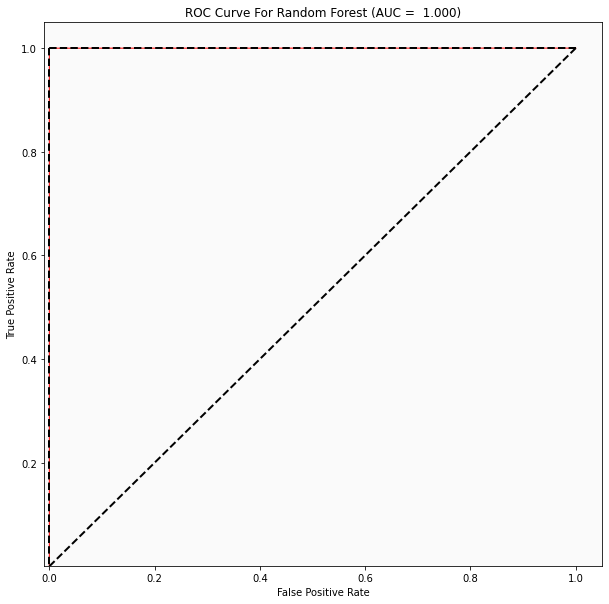

In [0]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))


Our model did great with AUC = 1


#Classification Report

- The classification report is available through sklearn.metrics, this report gives many important classification metrics including:

- Precision: also the positive predictive value, is the number of correct predictions divided by the number of correct predictions plus false positives, so tp/(tp+fp)

- Recall: also known as the sensitivity, is the number of correct predictions divided by the total number of instances so tp/(tp+fn)
where fn is the number of false negatives
- f1-score: this is defined as the weighted harmonic mean of both the precision and recall, where the f1-score at 1 is the best value and worst value at 0, as defined by the documentation
support: number of instances that are the correct target values

In [0]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test))

In [0]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    250973
           1       1.00      0.99      1.00      7520

    accuracy                           1.00    258493
   macro avg       1.00      1.00      1.00    258493
weighted avg       1.00      1.00      1.00    258493



In [0]:
confusion_matrix_rf = confusion_matrix(y_test, predictions_rf)

In [0]:
confusion_matrix_rf

array([[250972,     45],
       [     1,   7475]])

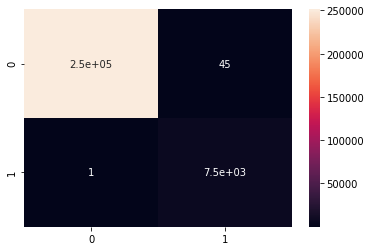

In [0]:
sc.heatmap(confusion_matrix_rf, annot=True)

In [0]:
list(confusion_matrix_rf.flatten())

[250972, 45, 1, 7475]

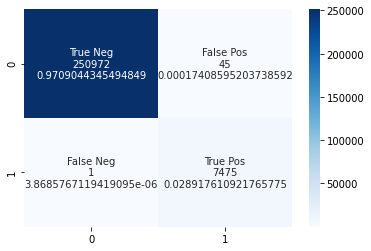

In [0]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = list(confusion_matrix_rf.flatten())
group_percentages = list(confusion_matrix_rf.flatten()/np.sum(confusion_matrix_rf))
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sc.heatmap(confusion_matrix_rf, annot=labels, fmt='', cmap='Blues')

#Conclusions

We've now gone through a number of metrics to assess the capabilities of our random forest, but there's still much that can be done using background information from the data set. Feature engineering would be a powerful tool for extracting information and moving forward into the research phase, and would help define key metrics to utilize when optimizing model parameters.

#QUESTION-1 


1. Load the dataset into R or Python and identify the type of the dataset features and report them.
- Done
2. Perform summary statistics and explain what issues these statistics reveal.
- Info and description of data is done 
3. Perform exploratory analysis to identify any collinearities and explain which issues collinear-ity causes.
-  Pandas Profiling is done
4. There is currently a problem in the data which will lead to inflation in the success of the metric of choice (i.e. inflated accuracy, or false reduction in loss). This will keep the model from generalizing to the test set. Please identify what it is and explain the problem.
- The data is highly biased and the possitive instances(1) in class label are very low compared to -ve instances(0). 
5. Propose and implement the solutions for the issues you have found. The issues listed here are not exhaustive. If you encounter any other issues, please propose and implement solutions for those as well.
- SMOTE is done on the data inorder to populate +ve instances 
6. Are there any data privacy and security issues in this dataset? If so, what are they? How would you solve these problems? 
- Few information collected like listing_id etc. by the agency might lead to privacy compromisation






#QUESTION-2

1. Calculate click -Through Rates and Conversion Rates
- click through rate is around 4%.
2. How do property review score and property star rating affect click-through and conversion rates? Employ statistical techniques to formally compare the effects of different levels of these variables.



#QUESTION-3

1. This dataset has 3 possible outcome variables: clicked, booking_value and booked. Select one of those variables to model and train a machine learning model of your choice. 
- selected class label : 'booked'
2. You are required to explain the following details: 
- Which outcome variable did you choose and why?
    - 'booked' variable is taken as class label in order to find wheather a person books a hotel or not based on his search history
- Which variables did you include in the initial model?
    

```
list(X_train.columns)
```


- Which transformations/preprocesses did you apply? Why did you apply those transformations?
    - null values are handled
    - outliers are handled using IQR techniques
    - Irregular sampling in class label was overcome using SMOTE technique
- What would have happened if you didn't apply those tech- niques?
    - The data would be biased and unclean and few algorithms throw errors if unclean data is sent and if SMOTE is not done model would be highly biased
- Which machine learning technique did you choose? Why? 
    - I used Random Forest technique to solve this particular problem, because it is highly reliable and high accuracy can be observed using it.
- Which evaluation metric did you use to optimize the machine learning model? Why did you choose it?
    - ROC and AUC are caluculated, I have used those as it is a binary classification type problem
- What are the implications of the final metric value?
    - The model is giving high accuray, recall, F-measure and also high AOC value
- How would you interpret this model?
    - I used SHAP to interpret this model
- If the model is too complex to be directly interpreted, how would you approach this problem?
    - A sub set of the data can be interpreted and it can be generalised to rest of the data.
